In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [133]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [134]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    int64  
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    int64  
 4   mnth             132 non-null    int64  
 5   holiday          132 non-null    int64  
 6   weekday          132 non-null    int64  
 7   workingday       132 non-null    int64  
 8   weathersit       132 non-null    int64  
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    int64  
 14  price reduction  132 non-null    int64  
 15  casual           132 non-null    int64  
 16  registered       132 non-null    int64  
 17  cnt             

In [135]:
sorted_df = test_df.sort_values(by=['instant'])


test_df = sorted_df.set_index('instant')

test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,74.80440,0.168726,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,102.95460,0.122132,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,80.67390,0.126548,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,72.56250,0.188433,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,129.25005,0.146775,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,135.81255,0.157975,869,0,441,2787,3228
711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,89.50005,0.296037,711,0,282,5219,5501
714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,96.43755,0.131229,528,0,429,5182,5611


In [136]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

In [137]:
test_df['weekday']

instant
7      5
11     2
14     5
16     0
18     2
      ..
709    0
711    2
714    5
718    2
730    0
Name: weekday, Length: 132, dtype: int64

In [138]:
test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

test_df['weekday']

instant
7      4
11     1
14     4
16     6
18     1
      ..
709    0
711    2
714    5
718    2
730    0
Name: weekday, Length: 132, dtype: int32

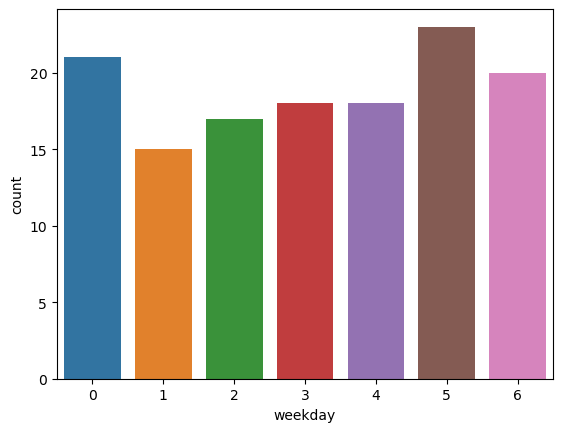

In [139]:
sns.countplot(x='weekday', data=test_df)
plt.show()

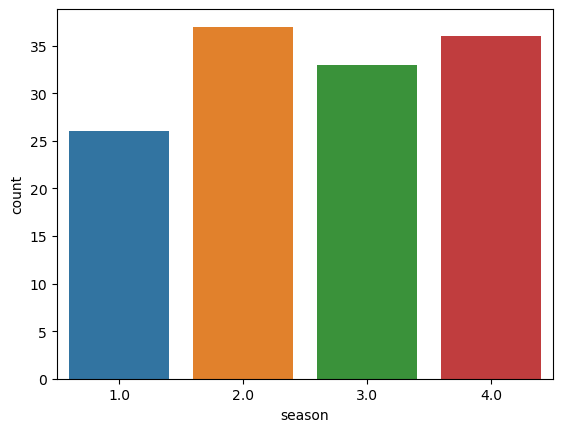

In [140]:
sns.countplot(x='season', data=test_df)
plt.show()

In [141]:
test_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,126.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000
mean,2.598485,0.515152,6.750000,0.022727,3.106061,0.704545,1.371212,19.844301,0.477679,93.645418,0.185349,749.55303,0.166667,999.825758,3755.166667,4754.992424
std,1.090275,0.501674,3.497818,0.149600,2.057411,0.457985,0.558150,7.827241,0.173988,21.467624,0.068409,178.50004,0.374098,2313.057147,1651.661972,3118.721529
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.895700,0.117930,0.000000,0.042304,458.00000,0.000000,9.000000,416.000000,431.000000
25%,2.000000,0.000000,3.750000,0.000000,1.000000,0.000000,1.000000,13.300000,0.325754,80.692913,0.135898,583.50000,0.000000,330.750000,2532.750000,3289.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.200000,0.470002,93.468750,0.179102,745.00000,0.000000,693.500000,3705.000000,4621.000000
75%,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.366675,0.635919,107.484413,0.227141,918.00000,0.000000,1138.500000,5112.000000,6145.250000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.933300,0.840896,139.500000,0.385571,1028.00000,1.000000,26506.000000,6803.000000,32472.000000


In [142]:
test_df = test_df.astype({'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float', 'weathersit':'float', 'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})

In [143]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 7 to 730
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dteday           132 non-null    object 
 1   season           132 non-null    float64
 2   yr               132 non-null    float64
 3   mnth             132 non-null    float64
 4   holiday          132 non-null    float64
 5   weekday          132 non-null    float64
 6   workingday       132 non-null    float64
 7   weathersit       132 non-null    float64
 8   temp             132 non-null    float64
 9   atemp            132 non-null    float64
 10  hum              126 non-null    float64
 11  windspeed        132 non-null    float64
 12  leaflets         132 non-null    float64
 13  price reduction  132 non-null    float64
 14  casual           132 non-null    float64
 15  registered       132 non-null    float64
 16  cnt              132 non-null    float64
dtypes: float64(16), objec

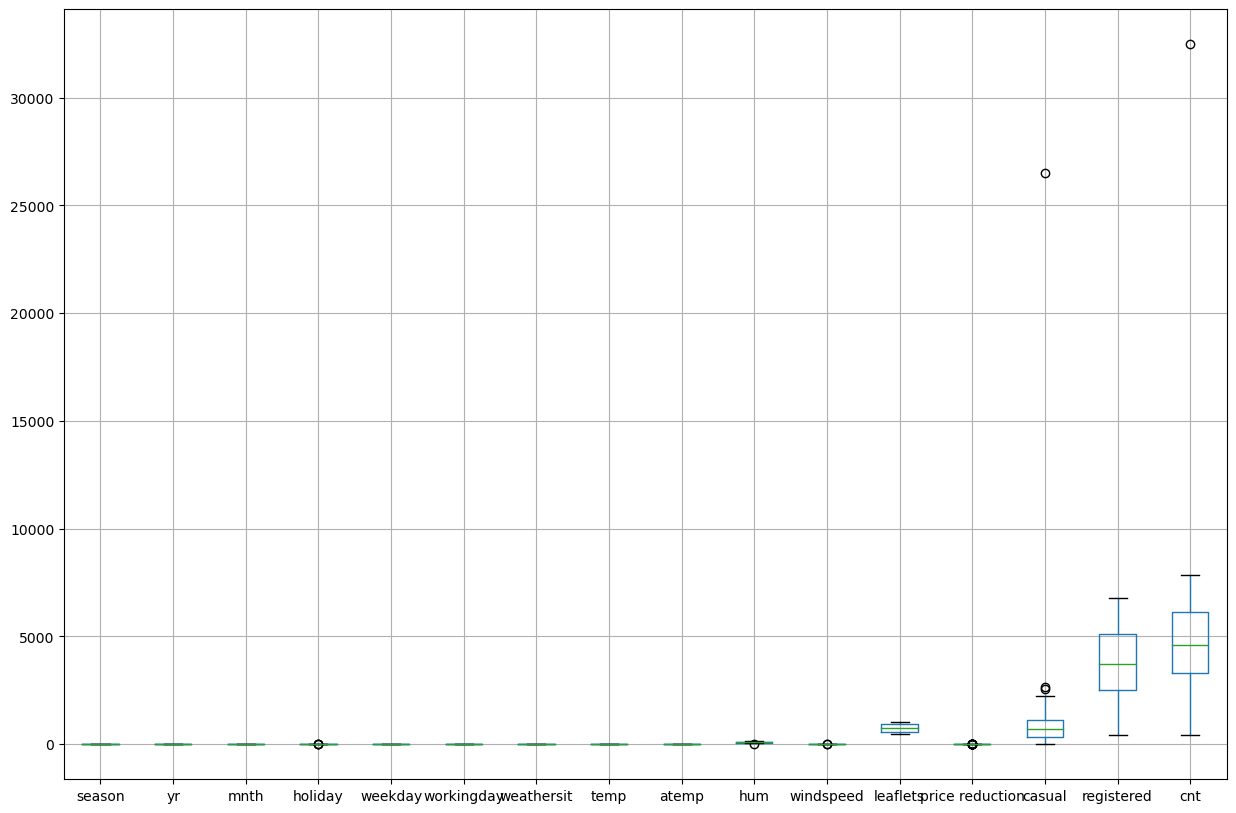

In [146]:
boxplot = test_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()

In [147]:
#Again, alot of hum values are over 100, so we have some outliers here
print(len(test_df[test_df["hum"] > 100]))
#Because of the amount of outliers, we delete hum again 
test_df = test_df.drop('hum', axis=1)

45


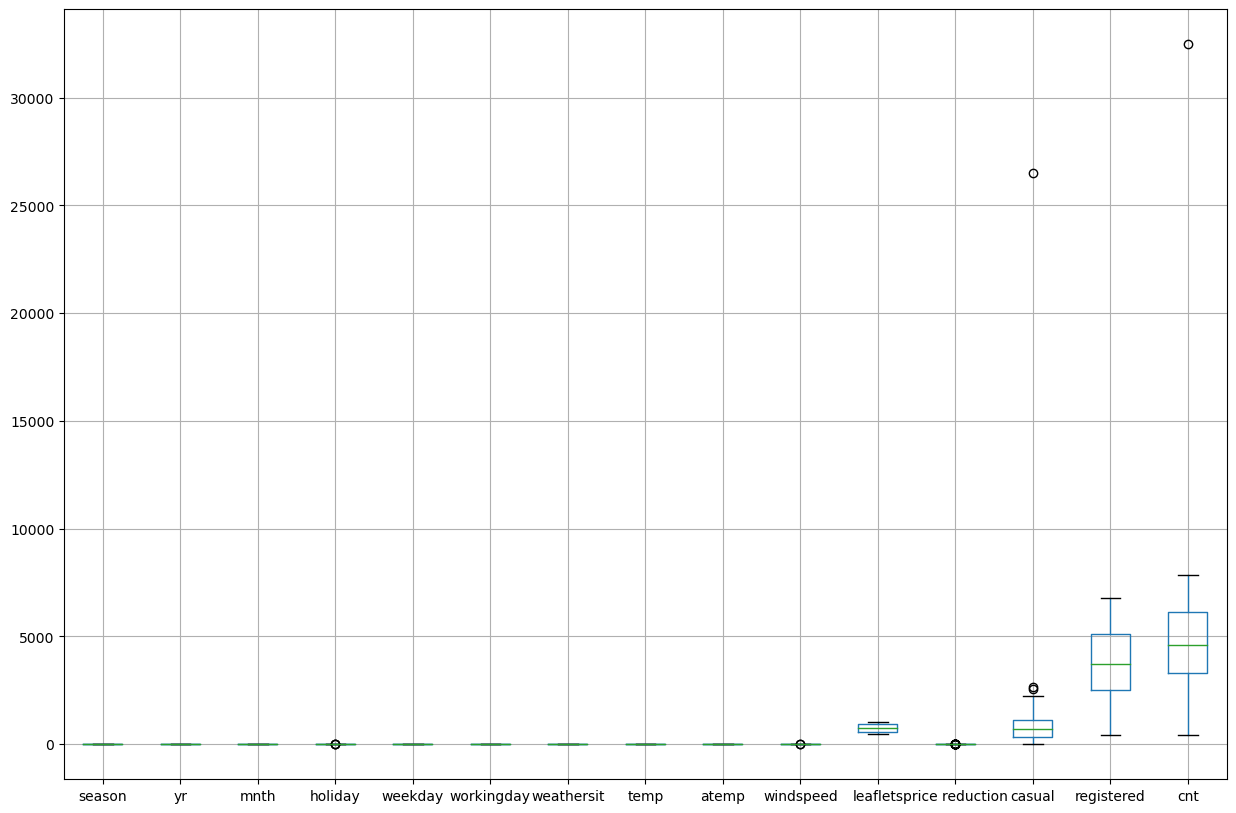

In [148]:
boxplot = test_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()

In [149]:
feature_test_df = test_df.iloc[:, :13]

In [150]:
feature_test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction
instant,,,,,,,,,,,,,
7,07.01.2011,1.0,0.0,1.0,0.0,4.0,1.0,2.0,7.8609,0.208839,0.168726,977.0,0.0
11,11.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,2.0,6.7636,0.191464,0.122132,1028.0,0.0
14,14.01.2011,1.0,0.0,1.0,0.0,4.0,1.0,1.0,6.4348,0.188413,0.126548,481.0,0.0
16,16.01.2011,1.0,0.0,1.0,0.0,6.0,0.0,1.0,9.2667,0.234217,0.188433,493.0,0.0
18,18.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,2.0,8.6667,0.232333,0.146775,989.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1.0,12.0,0.0,0.0,0.0,2.0,15.3667,0.390146,0.157975,869.0,0.0
711,11.12.2012,4.0,1.0,12.0,0.0,2.0,1.0,2.0,14.1333,0.338363,0.296037,711.0,0.0
714,14.12.2012,4.0,1.0,12.0,0.0,5.0,1.0,1.0,11.2667,0.294192,0.131229,528.0,0.0


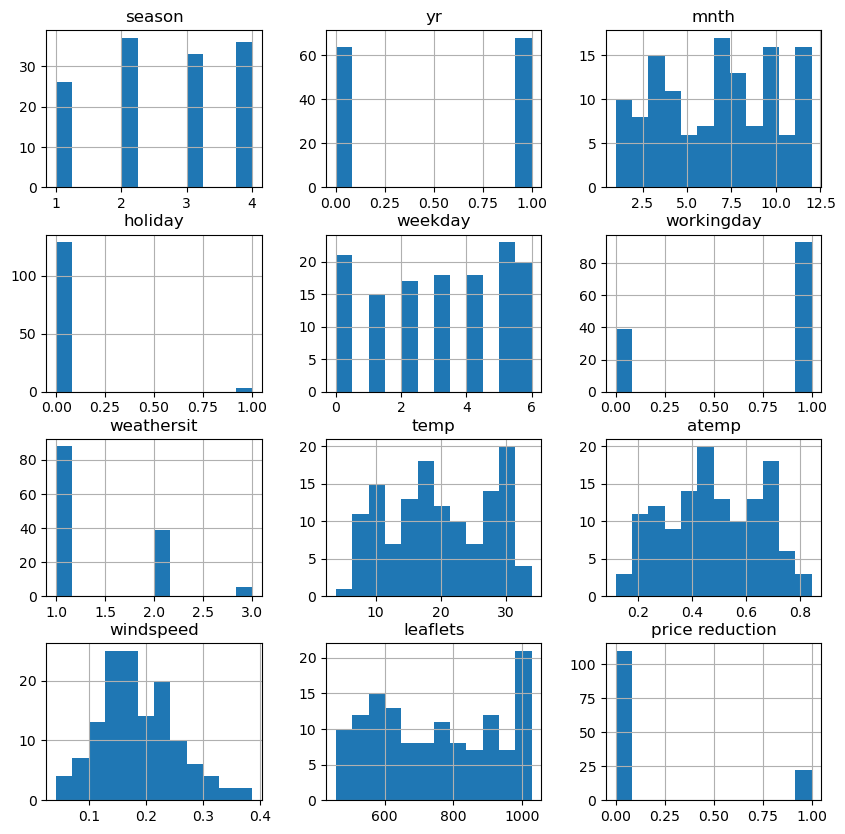

In [151]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

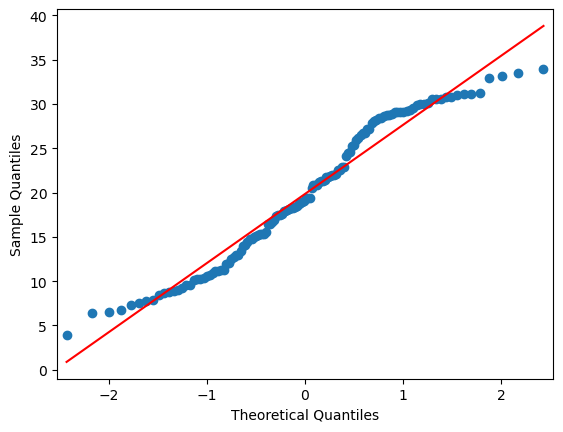

In [152]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(feature_test_df['temp'], line='s')
pyplot.show()

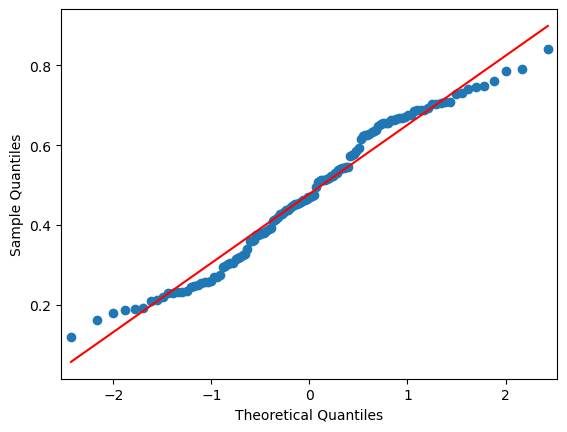

In [153]:
qqplot(feature_test_df['atemp'], line='s')
pyplot.show()

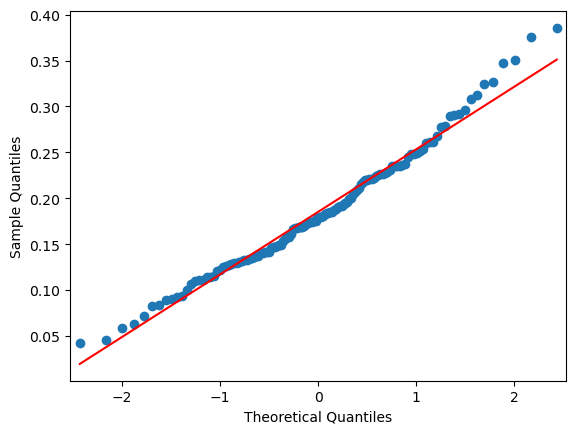

In [154]:
qqplot(feature_test_df['windspeed'], line='s')
pyplot.show()

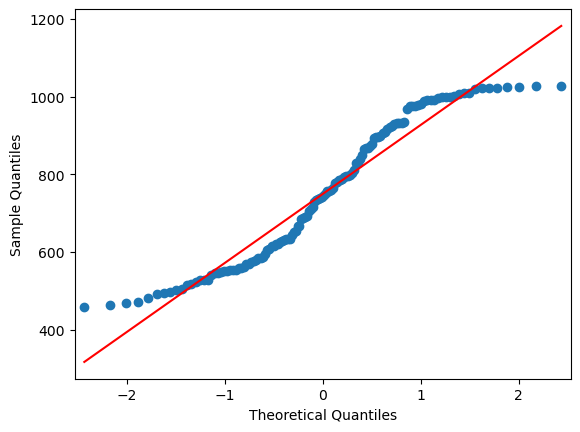

In [155]:
qqplot(feature_test_df['leaflets'], line='s')
pyplot.show()

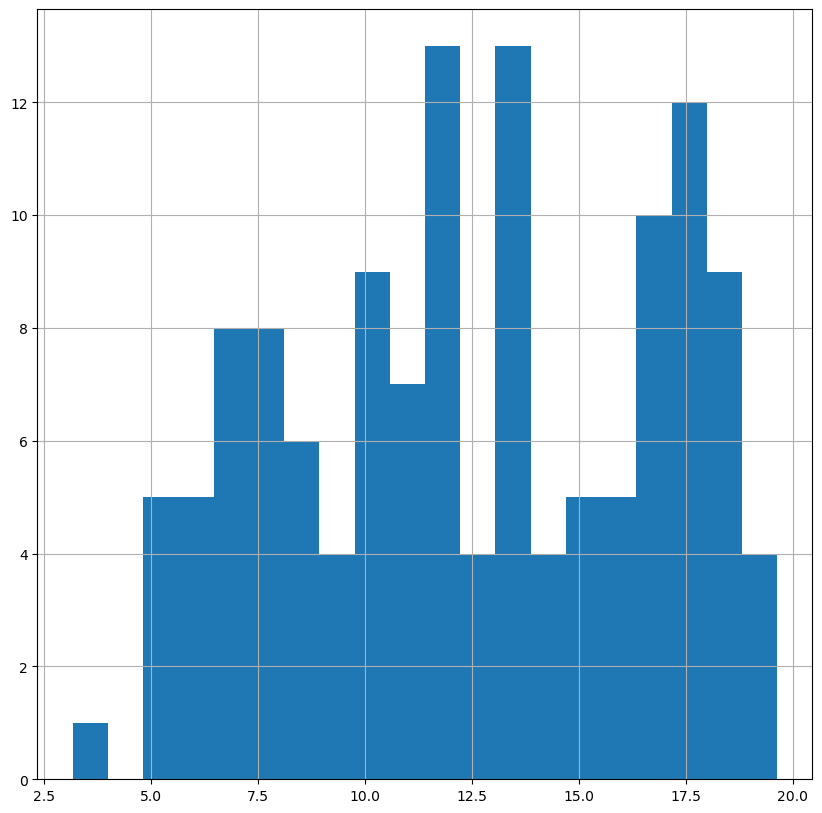

In [156]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(feature_test_df['temp'].array.reshape(-1, 1)))


feature_test_df['temp ptransformed']=trans_temp
hist = feature_test_df['temp ptransformed'].hist(bins=20,figsize=(10, 10))

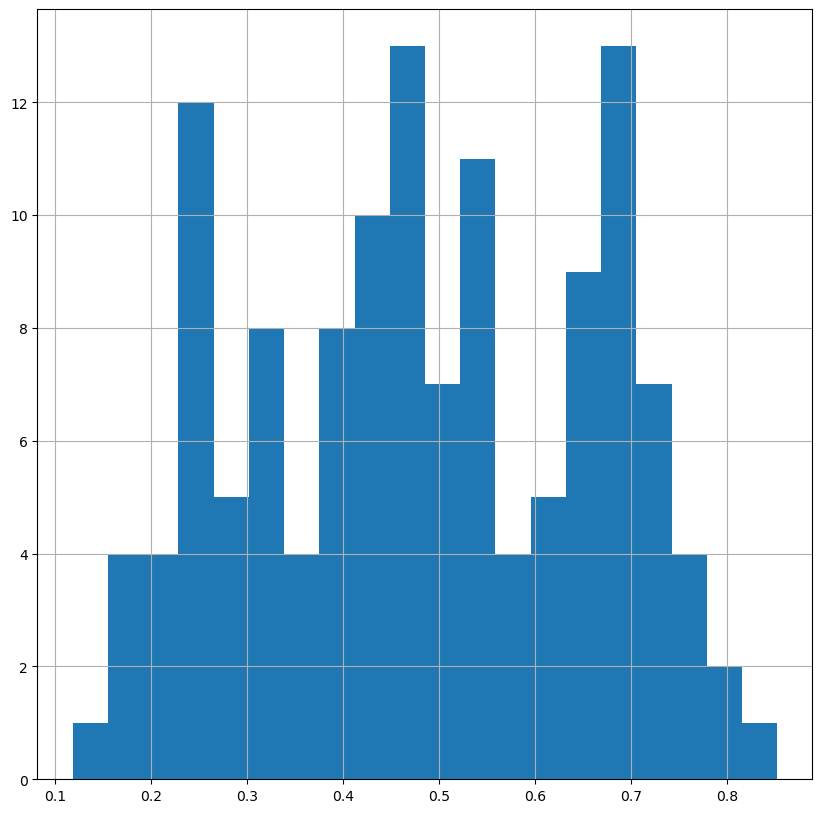

In [157]:
trans_atemp= pt.fit_transform(np.array(feature_test_df['atemp'].array.reshape(-1, 1)))


feature_test_df['atemp ptransformed']=trans_atemp
hist = feature_test_df['atemp ptransformed'].hist(bins=20,figsize=(10, 10))

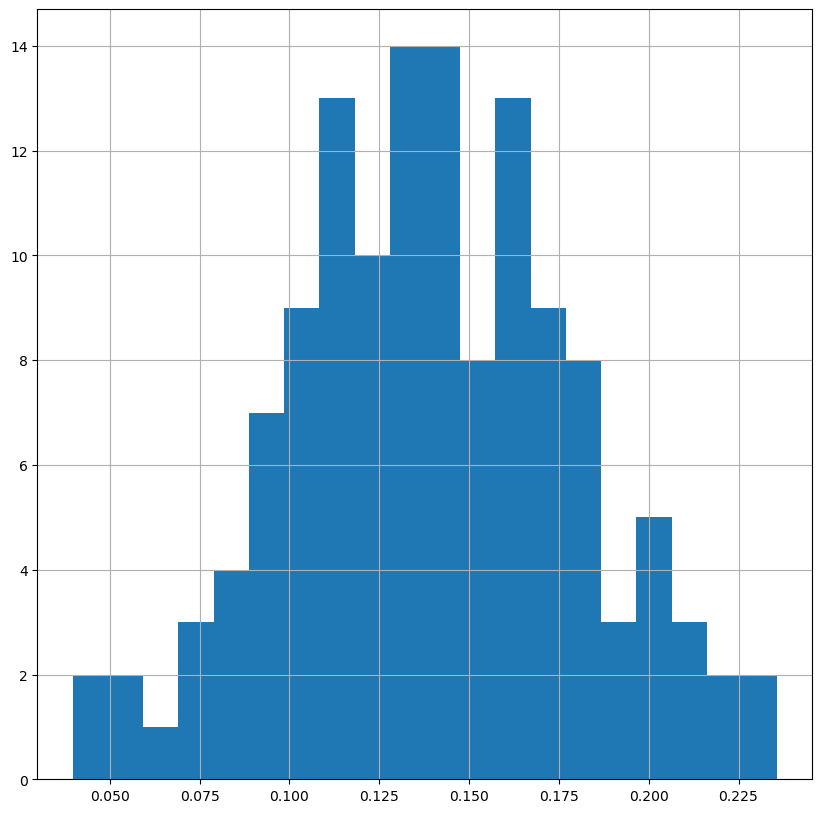

In [158]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].array.reshape(-1, 1)))


feature_test_df['windspeed ptransformed']=trans_windspeed
hist = feature_test_df['windspeed ptransformed'].hist(bins=20,figsize=(10, 10))

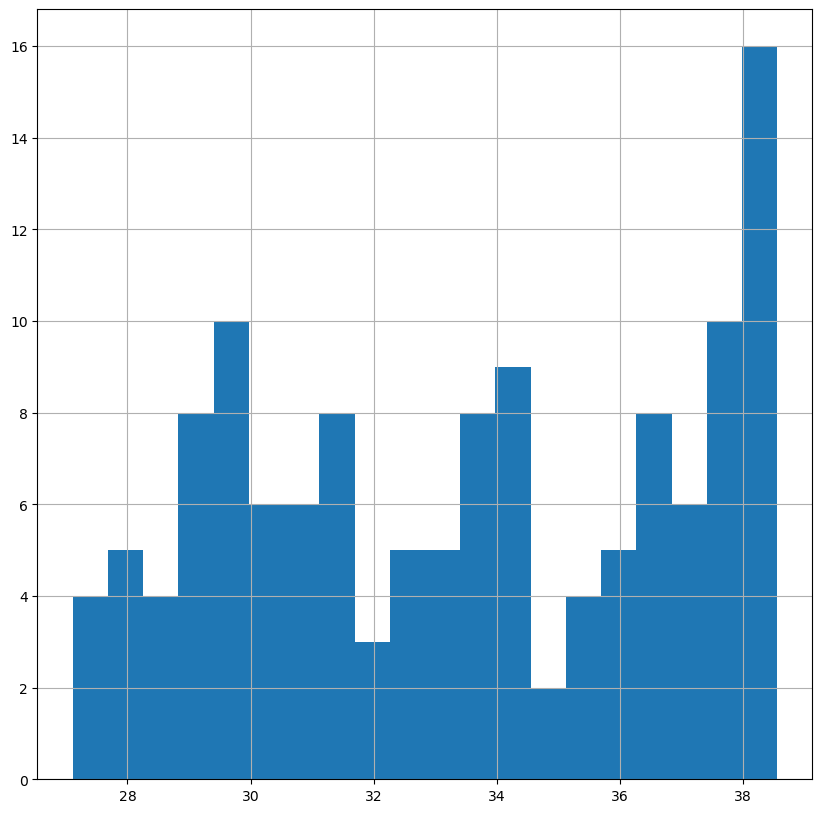

In [159]:
trans_leaflets= pt.fit_transform(np.array(feature_test_df['leaflets'].array.reshape(-1, 1)))


feature_test_df['leaflets ptransformed']=trans_leaflets
hist = feature_test_df['leaflets ptransformed'].hist(bins=20,figsize=(10, 10))